## Exploratory analysis on the effects of the staging data completeness on early diagnosis across regions

In this project, I am looking at if the early diagnosis (ED) percentage differences between pre-pandemic (2019) and pandemic periods (2020) across Cancer Alliances in England is due to changes in staging data completeness. 

### The cancer policy team wants us to focus on answering the following questions:
1. Is the drop in ED rate during the pandemic due to a drop in staging data completeness?


### Methods:
Look at the association between the 2019 to 2020 ED change, against reported levels of stage completeness or missing stage data between 2019 and 2020, across geographies (sub-ICBs). 
1. % change in ED rate 2020 vs 2019 
2. %  change in stage completeness 2020 vs 2019 
3. Is there a correlation between ED % change and stage completeness % change? If so, which direction?
- Plotting correlations between ED rate % change vs stage completeness % change
- Pearson's correlation coefficients

## Read in the data 

In [1]:
pip install pandas_ods_reader

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install odfpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from pandas_ods_reader import read_ods

In [4]:
################################################################################
# Load the dataset # 
################################################################################
df = pd.read_excel('CMA stage 2013-2020 data (corrected).ods', sheet_name='Table_2', header = 2)

In [5]:
## Quick exploration of the data
df

,Geography code,Geography name,Diagnosis year(s),Number of cancers diagnosed at stages 1 & 2,Number of staged cancers,Unadjusted percentage diagnosed at stages 1 & 2,Unadjusted percentage lower 95% confidence interval,Unadjusted percentage upper 95% confidence interval,Case-mix adjusted percentage diagnosed at stages 1 & 2,Case-mix adjusted lower 95% confidence interval,Case-mix adjusted upper 95% confidence interval,Reliability,Stage completeness (%)
0,E92000001,England,2013,105659,192791,54.8,54.6,55.0,54.8,54.6,55.0,NaN,79.0
1,E92000001,England,2013-2015,342238,623165,54.9,54.8,55.0,54.8,54.7,54.9,NaN,84.5
2,E92000001,England,2014,115542,209562,55.1,54.9,55.3,55.1,54.9,55.3,NaN,85.3
3,E92000001,England,2014-2016,359462,655438,54.8,54.7,55.0,54.8,54.7,54.9,NaN,88.1
4,E92000001,England,2015,121037,220812,54.8,54.6,55.0,55.1,54.9,55.3,NaN,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,E38000254,NHS West Yorkshire ICB - X2C4Y,2017-2019,2578,5090,50.6,49.3,52.0,52.1,50.9,53.3,0.9,88.7
1494,E38000254,NHS West Yorkshire ICB - X2C4Y,2018,930,1839,50.6,48.3,52.9,52.0,50.0,54.0,0.7,92.7
1495,E38000254,NHS West Yorkshire ICB - X2C4Y,2018-2020,2538,4969,51.1,49.7,52.5,52.3,51.1,53.5,0.9,88.1
1496,E38000254,NHS West Yorkshire ICB - X2C4Y,2019,804,1549,51.9,49.4,54.4,53.1,50.9,55.3,0.7,79.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498 entries, 0 to 1497
Data columns (total 13 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Geography code                                          1498 non-null   object 
 1   Geography name                                          1498 non-null   object 
 2   Diagnosis year(s)                                       1498 non-null   object 
 3   Number of cancers diagnosed at stages 1 & 2             1498 non-null   int64  
 4   Number of staged cancers                                1498 non-null   int64  
 5   Unadjusted percentage diagnosed at stages 1 & 2         1498 non-null   float64
 6   Unadjusted percentage lower 95% confidence interval     1498 non-null   float64
 7   Unadjusted percentage upper 95% confidence interval     1498 non-null   float64
 8   Case-mix adjusted percentage diagnosed

In [7]:
df.describe()

,Number of cancers diagnosed at stages 1 & 2,Number of staged cancers,Unadjusted percentage diagnosed at stages 1 & 2,Unadjusted percentage lower 95% confidence interval,Unadjusted percentage upper 95% confidence interval,Case-mix adjusted percentage diagnosed at stages 1 & 2,Case-mix adjusted lower 95% confidence interval,Case-mix adjusted upper 95% confidence interval,Reliability,Stage completeness (%)
count,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1484.000000,1498.000000
mean,4129.176235,7572.918558,53.888919,51.782977,55.979039,54.583244,52.723698,56.428838,0.707210,87.210414
std,24161.756288,44288.288951,2.626568,3.026026,2.513953,1.870727,2.123946,1.953100,0.164013,6.263078
min,165.000000,298.000000,43.700000,39.300000,48.100000,48.000000,44.100000,51.300000,0.300000,50.100000
25%,719.500000,1374.000000,52.100000,49.800000,54.300000,53.400000,51.400000,55.000000,0.600000,85.000000
50%,1394.500000,2591.000000,53.900000,51.900000,55.900000,54.700000,53.000000,56.400000,0.700000,88.900000
75%,2536.250000,4757.000000,55.800000,54.000000,57.700000,55.900000,54.200000,57.700000,0.800000,91.200000
max,373596.000000,685638.000000,62.000000,59.300000,64.900000,61.200000,58.600000,63.800000,1.100000,95.700000


### Filter the Data 

For this project, we'll only analyze 2019 and 2020 data, so we'll only select years containing the years '2019' and '2020'.

In [8]:
#Filter by 2019 data
Data_2019 = df[df['Diagnosis year(s)'] == 2019].copy()
Data_2019

,Geography code,Geography name,Diagnosis year(s),Number of cancers diagnosed at stages 1 & 2,Number of staged cancers,Unadjusted percentage diagnosed at stages 1 & 2,Unadjusted percentage lower 95% confidence interval,Unadjusted percentage upper 95% confidence interval,Case-mix adjusted percentage diagnosed at stages 1 & 2,Case-mix adjusted lower 95% confidence interval,Case-mix adjusted upper 95% confidence interval,Reliability,Stage completeness (%)
12,E92000001,England,2019,117249,213680,54.9,54.7,55.1,55.2,55.0,55.4,NaN,80.1
26,E38000231,"NHS Bath and North East Somerset, Swindon and ...",2019,2258,3949,57.2,55.6,58.7,54.7,53.3,56.1,0.9,88.6
40,E38000249,"NHS Bedfordshire, Luton and Milton Keynes ICB ...",2019,2095,3617,57.9,56.3,59.5,57.2,55.8,58.7,0.9,89.6
54,E38000258,NHS Birmingham and Solihull ICB - 15E,2019,2368,4295,55.1,53.6,56.6,55.9,54.6,57.3,0.9,83.9
68,E38000259,NHS Black Country ICB - D2P2L,2019,2517,4613,54.6,53.1,56.0,56.8,55.5,58.0,0.9,84.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440,E38000025,NHS West Yorkshire ICB - 02T,2019,510,916,55.7,52.4,58.9,55.8,52.9,58.6,0.6,87.7
1454,E38000190,NHS West Yorkshire ICB - 03R,2019,797,1459,54.6,52.1,57.2,54.8,52.5,57.0,0.7,79.0
1468,E38000225,NHS West Yorkshire ICB - 15F,2019,1753,3198,54.8,53.1,56.5,55.9,54.4,57.5,0.8,84.9
1482,E38000232,NHS West Yorkshire ICB - 36J,2019,969,1866,51.9,49.7,54.2,54.7,52.7,56.7,0.7,79.2


In [9]:
#Filter by 2020 data
Data_2020 = df[df['Diagnosis year(s)'] == 2020].copy()
Data_2020

,Geography code,Geography name,Diagnosis year(s),Number of cancers diagnosed at stages 1 & 2,Number of staged cancers,Unadjusted percentage diagnosed at stages 1 & 2,Unadjusted percentage lower 95% confidence interval,Unadjusted percentage upper 95% confidence interval,Case-mix adjusted percentage diagnosed at stages 1 & 2,Case-mix adjusted lower 95% confidence interval,Case-mix adjusted upper 95% confidence interval,Reliability,Stage completeness (%)
13,E92000001,England,2020,102265,195504,52.3,52.1,52.5,53.4,53.2,53.6,NaN,84.3
27,E38000231,"NHS Bath and North East Somerset, Swindon and ...",2020,1905,3565,53.4,51.8,55.1,52.3,50.8,53.8,0.8,87.7
41,E38000249,"NHS Bedfordshire, Luton and Milton Keynes ICB ...",2020,1702,3064,55.5,53.8,57.3,54.8,53.2,56.4,0.8,88.0
55,E38000258,NHS Birmingham and Solihull ICB - 15E,2020,1982,3822,51.9,50.3,53.4,55.1,53.7,56.5,0.8,88.4
69,E38000259,NHS Black Country ICB - D2P2L,2020,1985,3859,51.4,49.9,53.0,54.5,53.1,55.9,0.8,85.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1441,E38000025,NHS West Yorkshire ICB - 02T,2020,411,818,50.2,46.8,53.7,51.6,48.6,54.7,0.5,92.8
1455,E38000190,NHS West Yorkshire ICB - 03R,2020,754,1482,50.9,48.3,53.4,53.3,51.1,55.6,0.6,92.4
1469,E38000225,NHS West Yorkshire ICB - 15F,2020,1483,2817,52.6,50.8,54.5,54.5,52.9,56.2,0.8,93.0
1483,E38000232,NHS West Yorkshire ICB - 36J,2020,882,1762,50.1,47.7,52.4,53.5,51.4,55.6,0.7,83.3


In [10]:
# % change for 2019 vs 2020

Data_2020['Unadjusted percentage diagnosed at stages 1 & 2 difference from 2019'] = Data_2020['Unadjusted percentage diagnosed at stages 1 & 2'] - Data_2020['Geography name'].map(Data_2019.set_index('Geography name')['Unadjusted percentage diagnosed at stages 1 & 2'])

Data_2020['Stage completeness % difference from 2019'] = Data_2020['Stage completeness (%)'] - Data_2020['Geography name'].map(Data_2019.set_index('Geography name')['Stage completeness (%)'])

Data_2020

,Geography code,Geography name,Diagnosis year(s),Number of cancers diagnosed at stages 1 & 2,Number of staged cancers,Unadjusted percentage diagnosed at stages 1 & 2,Unadjusted percentage lower 95% confidence interval,Unadjusted percentage upper 95% confidence interval,Case-mix adjusted percentage diagnosed at stages 1 & 2,Case-mix adjusted lower 95% confidence interval,Case-mix adjusted upper 95% confidence interval,Reliability,Stage completeness (%),Unadjusted percentage diagnosed at stages 1 & 2 difference from 2019,Stage completeness % difference from 2019
13,E92000001,England,2020,102265,195504,52.3,52.1,52.5,53.4,53.2,53.6,NaN,84.3,-2.6,4.2
27,E38000231,"NHS Bath and North East Somerset, Swindon and ...",2020,1905,3565,53.4,51.8,55.1,52.3,50.8,53.8,0.8,87.7,-3.8,-0.9
41,E38000249,"NHS Bedfordshire, Luton and Milton Keynes ICB ...",2020,1702,3064,55.5,53.8,57.3,54.8,53.2,56.4,0.8,88.0,-2.4,-1.6
55,E38000258,NHS Birmingham and Solihull ICB - 15E,2020,1982,3822,51.9,50.3,53.4,55.1,53.7,56.5,0.8,88.4,-3.2,4.5
69,E38000259,NHS Black Country ICB - D2P2L,2020,1985,3859,51.4,49.9,53.0,54.5,53.1,55.9,0.8,85.3,-3.2,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1441,E38000025,NHS West Yorkshire ICB - 02T,2020,411,818,50.2,46.8,53.7,51.6,48.6,54.7,0.5,92.8,-5.5,5.1
1455,E38000190,NHS West Yorkshire ICB - 03R,2020,754,1482,50.9,48.3,53.4,53.3,51.1,55.6,0.6,92.4,-3.7,13.4
1469,E38000225,NHS West Yorkshire ICB - 15F,2020,1483,2817,52.6,50.8,54.5,54.5,52.9,56.2,0.8,93.0,-2.2,8.1
1483,E38000232,NHS West Yorkshire ICB - 36J,2020,882,1762,50.1,47.7,52.4,53.5,51.4,55.6,0.7,83.3,-1.8,4.1


## Plotting correlations between ED rate and stage completeness % difference


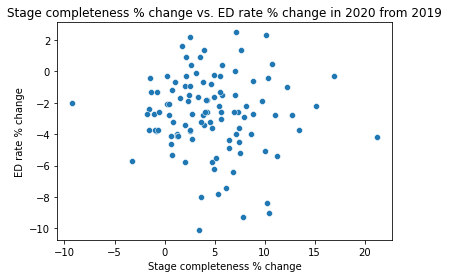

In [11]:
# Scatter plot

import seaborn as sns
ax = sns.scatterplot(x="Stage completeness % difference from 2019", y="Unadjusted percentage diagnosed at stages 1 & 2 difference from 2019", data=Data_2020);
ax.set_title("Stage completeness % change vs. ED rate % change in 2020 from 2019")
ax.set_xlabel("Stage completeness % change")
ax.set_ylabel("ED rate % change");

## Correlation coefficient

In [12]:
from scipy import stats
stats.pearsonr(Data_2020['Unadjusted percentage diagnosed at stages 1 & 2 difference from 2019'], Data_2020['Stage completeness % difference from 2019'])

(-0.05691790732755362, 0.5603508443941567)

## No correlation between ED rate and stage completness % change


As expected, there is no correlation as seen in both the scatter plot and Pearson correlation coefficient (r= -0.06 and p-value > 0.05) 